# ING Insights


Notebook used to categorize and automatically analyse transations data from ING Bank Account. This account is aggregation transaction information from all accounts in ING Bank as well as Millennium.

Analysis should be used to aggregate per month infomrations infomrations about spending, mainly from accounts `Wspólne`, `Osobiste`, `Millennium`.


**TODO**
- [ ] Export to Excel
- [ ] Different data analysis options
- [ ] Make mark in Excel file which rows were analysed by the tool

## 01 - Importing data

Import data from ING Bank history export. Class used to import the data `TransactionDataLoader` consisting fetching mechanism with data sanitization finctionalities.

In [187]:
from pathlib import Path

from data_loader import *

csv_import_1 = Path("data/Lista_transakcji_nr_0202366310_201224.csv")
csv_import_2 = Path("data/20241220_lista_transkcji_ing_mill_90.csv")
csv_import_3 = Path("data/Lista_transakcji_nr_0202026071_161224_ING_MILL.csv")

df = TransactionDataLoader(csv_import_1).get_data()
print(f"Successfully imported dataframe with size {df.shape}\n\n")



Successfully imported dataframe with size (240, 21)




## 02 - Data filtering and sanitization


Filter only usefully columns for further data analysis. This will be the base for further analysis of data.


In [188]:
selected_columns = ['Data transakcji', 'Dane kontrahenta', 'Tytuł', 'Kwota transakcji (waluta rachunku)', 'Bank']
f_df = df[selected_columns]


## 03 - Categorization


Define categories for analysis and fill the data based on filter definition applied to `Dane kontrachenta` in `f_df` data frame.


In [189]:
"""
Input data for analysis: f_df
"""

#ExpenceCategiries instance containing objects of expense category.
expense_category_list = [
    ExpenseCategory(name="Zakupy spożywcze", filter="LIDL|BIED|ZAB|PIEKARNIA|Zygula|Piekarstwo|CARREFOUR|FAMILIJNA|CENTRUM WINA"),
    ExpenseCategory(name="Kosmetyki", filter="ROSSMANN|notino"),
    ExpenseCategory(name="Restauracje", filter="PIAZZA|COCKPEAT|CHLEBOTEKA|WHISKEYINTHEJAR|TUTTI|NEWPORT CAFE|SHRIMP HOUSE"),
    ExpenseCategory(name="Zdrowie", filter="APTEKA|LUX MED|SUPER-PHARM"),
    ExpenseCategory(name="Transport", filter="SHELL|Myjnia|ORLEN|WROCLAVIA PARKING|Taxi|APCOA|Autopay")
]

# Filter f_df dataframe and fill each ExpenseCategory data class attributes.
for i in range(len(expense_category_list)):
    expense_category_list[i].data_frame = f_df[
        f_df["Dane kontrahenta"].str.contains(expense_category_list[i].filter) == True]

    expense_category_list[i].sum = abs(
        round(float(expense_category_list[i].data_frame["Kwota transakcji (waluta rachunku)"].sum()), 2))

Transform `expense_category_list` to data frame.

In [190]:
from dataclasses import asdict

expense_dicts = [asdict(expense) for expense in expense_category_list]
temp_df = pd.DataFrame(expense_dicts)


Plot

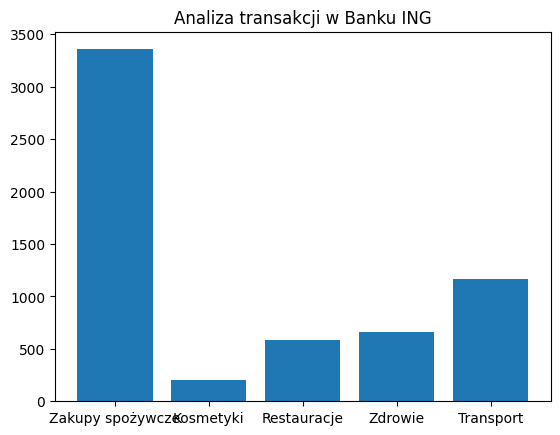

,name,sum
0,Zakupy spożywcze,3357.55
1,Kosmetyki,204.56
2,Restauracje,582.40
3,Zdrowie,663.77
4,Transport,1163.79


In [191]:
import matplotlib.pyplot as plt

# Plot the bar chart
bars = plt.bar(temp_df['name'], temp_df['sum'])

plt.title('Analiza transakcji w Banku ING')

# Show the plot
plt.show()

temp_df[['name', 'sum']]

In [192]:
# Verification of category mapping

print(i for i in range(len(expense_category_list)))

expense_category_list[4].data_frame


<generator object <genexpr> at 0x124c5cf40>


,Data transakcji,Dane kontrahenta,Tytuł,Kwota transakcji (waluta rachunku),Bank
3,2024-11-30,Myjnia NIKITA Sz. Klacz Wroclaw P,Płatność kartą 30.11.2024 Nr karty 4246xx0146,-6.00,ING Bank Śląski S.A.
4,2024-11-30,Myjnia NIKITA Sz. Klacz Wroclaw P,Płatność kartą 30.11.2024 Nr karty 4246xx0146,-6.00,ING Bank Śląski S.A.
39,2024-11-25,WROCLAVIA PARKING WROCLAW POL 2024 -11-22,WROCLAVIA PARKING WROCLAW POL 2024 -11-22,-10.00,Bank Millennium S.A
47,2024-11-25,SHELL 09 Wroclaw POL,Płatność kartą 25.11.2024 Nr karty 4246xx0146,-195.07,ING Bank Śląski S.A.
53,2024-11-24,ORLEN STACJA NR 464 WARSZAWA POL,Płatność kartą 24.11.2024 Nr karty 4246xx0146,-15.88,ING Bank Śląski S.A.
54,2024-11-24,ORLEN STACJA NR 464 WARSZAWA POL,Płatność kartą 24.11.2024 Nr karty 4246xx0146,-270.22,ING Bank Śląski S.A.
62,2024-11-23,Taxi Agnieszka Wroclaw POL,Płatność kartą 23.11.2024 Nr karty 4246xx0146,-50.00,ING Bank Śląski S.A.
84,2024-11-19,WROCLAVIA PARKING WROCLAW POL,Płatność kartą 19.11.2024 Nr karty 4246xx3990,-15.00,ING Bank Śląski S.A.
121,2024-11-14,ORLEN STACJA NR 459 LANY POL,Płatność kartą 14.11.2024 Nr karty 4246xx0146,-317.67,ING Bank Śląski S.A.
143,2024-11-12,SHELL 01 Ruda Slaska POL 2024-11-1 0,SHELL 01 Ruda Slaska POL 2024-11-1 0,-33.97,Bank Millennium S.A
